In [18]:
import networkx as nx
import triad_utils
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import methods
import random as rn
import gzip 


In [19]:
def convert_to_regular_triads(networkx_triads):
    census = []
    census.append(networkx_triads['021D'])
    census.append(networkx_triads['021U'])
    census.append(networkx_triads['021C'])
    census.append(networkx_triads['111D'])
    census.append(networkx_triads['111U'])
    census.append(networkx_triads['201'])
    census.append(networkx_triads['030T'])
    census.append(networkx_triads['030C'])
    census.append(networkx_triads['120D'])
    census.append(networkx_triads['120U'])
    census.append(networkx_triads['120C'])
    census.append(networkx_triads['210'])
    census.append(networkx_triads['300'])
    return census


In [28]:
with open("comm-f2f-Resistance/network_list.csv", 'r') as file:
    lines = file.readlines()

l = []
for line in lines:
    n1, n2 = line.strip().split(",")[0:2]
    l.append((n1, n2))
    
data = nx.DiGraph(l)
census = convert_to_regular_triads(nx.triadic_census(data))
print(census)
data_matrix = nx.adjacency_matrix(data)[3:][3:]
data_matrix = data_matrix.toarray()
significance_profile_commf2f = triad_utils.triad_significance_profile(census, data_matrix, 30,100)

[0, 659, 31, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [24]:
with open("congress.edgelist", 'r') as file:
    lines = file.readlines()

l = []
for line in lines:
    n1, n2 = line.strip().split(" ")[0:2]
    l.append((n1, n2))

congress = nx.DiGraph(l)
census2 = convert_to_regular_triads(nx.triadic_census(congress))
print(census2)
data_matrix_congress = nx.adjacency_matrix(congress)[3:][3:]
data_matrix_congress = data_matrix_congress.toarray()
significance_profile_congress = triad_utils.triad_significance_profile(census2, data_matrix_congress, 20,100)

[65548, 78980, 70066, 94729, 76108, 40051, 13929, 882, 8863, 6112, 6367, 12549, 3631]


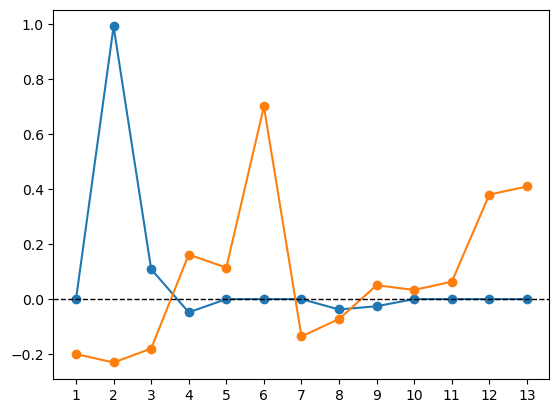

In [25]:
profile_plot = plt.plot(significance_profile_commf2f, "o-")
profile_plot = plt.plot(significance_profile_congress, "o-")
plt.xticks(range(0,13),range(1,14))
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
image = plt.savefig("image.png")